<a href="https://colab.research.google.com/github/pratyush2602/IMDB-review-SA/blob/main/IMDB_review_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#For this project, we will be using the dataset provided by Keras. This dataset is already preprocessed, and the text (reviews) is already converted to its numeric representation.

In [ ]:
#Load the dataset
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import imdb

((XT,YT), (Xt,Yt)) = imdb.load_data(num_words = 10000) #we only want the top 10000 words that most frequently occur in the dataset
print("Dataset loaded!")

17464789/17464789 [==============================] - 0s 0us/step
Dataset loaded!


In [ ]:
print("The length of the Training Dataset: ", len(XT))
print("The length of the Testing Dataset: ", len(Xt))

The length of the Training Dataset:  25000
The length of the Testing Dataset:  25000


In [ ]:
print(XT[0])
print(len(XT[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [ ]:
word_idx = imdb.get_word_index() #returns dict with words mapped to nums
idx_word = dict([value, key] for (key,value) in word_idx.items()) #inverted above dict to suit our dataset

actual_review = ' '.join([idx_word.get(idx-3, '?') for idx in XT[0]])#list comprehension to join each word and get actual review
#? when no word is matched with the number in the review

#One more thing to note here is that the indices are offset by three because 0, 1, and 2 are reserved indices for “padding”,
#“start of sequence” and “unknown”. That’s why we used the idx-3 expression in the code.

print(actual_review)
print(len(actual_review.split()))

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [ ]:
#Padding

from tensorflow.keras.preprocessing import sequence

#we assume maxlen of reviews to be 500 => padding makes 2d vector (25000,500)
#where 25000 is num of reviews

X_train = sequence.pad_sequences(XT, maxlen = 500)
X_test = sequence.pad_sequences(Xt, maxlen = 500)

print("Padding completed!")

Padding completed!


In [ ]:
print(X_train[0])
#data is ready to be used

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
#model architecture

from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(40000,192)) # 10000 words get embedded into vector of size 64

model.add(SimpleRNN(64)) #activation len 32
model.add(Dense(1, activation="sigmoid"))

print(model.summary())

#single embedding matrix that gets trained and is shared among all the inputs and RNN cells

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          640000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print("Model compiled successfully")

Model compiled successfully


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)
earlystop = EarlyStopping(monitor='val_acc', patience=1)

print("CallBack created!")

CallBack created!


In [ ]:
#traint the model
hist = model.fit(X_train, YT, validation_split=0.2, epochs=10, batch_size=128, callbacks=[checkpoint,earlystop])

Epoch 1/10
157/157 [==============================] - 45s 274ms/step - loss: 0.5618 - acc: 0.7003 - val_loss: 0.4422 - val_acc: 0.8090
Epoch 2/10
157/157 [==============================] - 49s 314ms/step - loss: 0.3338 - acc: 0.8648 - val_loss: 0.3627 - val_acc: 0.8462
Epoch 3/10
157/157 [==============================] - 52s 334ms/step - loss: 0.2322 - acc: 0.9112 - val_loss: 0.3788 - val_acc: 0.8370


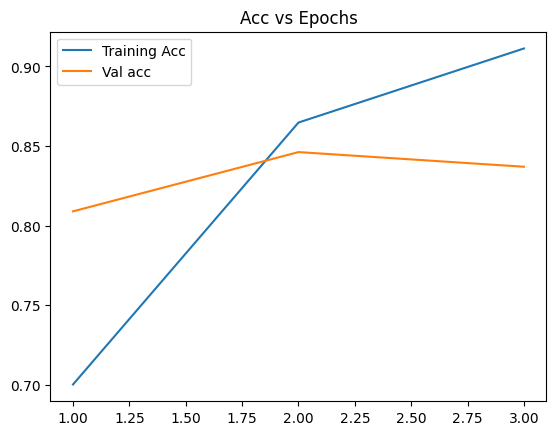

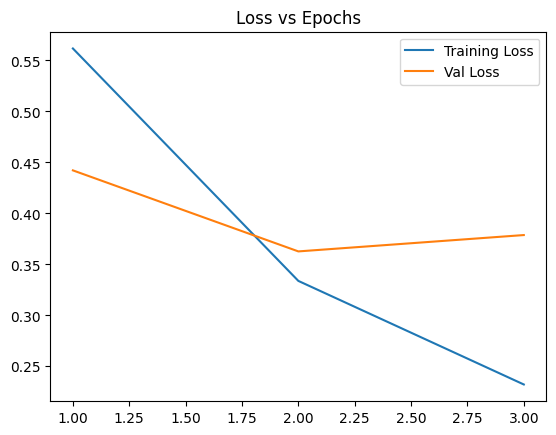

In [ ]:
#Visualizing the results
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(loss)+1)

plt.title("Acc vs Epochs")
plt.plot(epochs, acc, label="Training Acc")
plt.plot(epochs, val_acc, label="Val acc")
plt.legend()
plt.show()

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()

In [ ]:
#Test the model
model.evaluate(X_test,Yt)

782/782 [==============================] - 27s 34ms/step - loss: 0.3853 - acc: 0.8331


[0.3853372633457184, 0.833079993724823]

In [ ]:
#Run model against my input

sentence = "This movie is kinda good. I like it because the actress is my favourite"
input = []

word_idx = imdb.get_word_index()

for word in sentence.split():
  if word in word_idx.keys():
    input.append(word_idx[word])
  else:
    input.append(1)

print(input)

final_input = sequence.pad_sequences([input], maxlen=500)

sentiment = model.predict(final_input)

if(sentiment > 0.5):
  print("Positive review")
else:
  print("Negative review")

[1, 17, 6, 1929, 1, 1, 37, 9, 85, 1, 521, 6, 58, 1637]
1/1 [==============================] - 0s 54ms/step
Positive review
